Load packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [4]:
train.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


Determine missingness

In [5]:
country_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
country_grp = country_grp.groupby('country')['sales_na'].agg(['count','sum'])

# sns.heatmap(country_grp.to_frame(), cmap='coolwarm')    # heatmap of missing values in 'num_sold' column

In [6]:
country_grp 

,count,sum
country,,
Canada,38355,4246
Finland,38355,0
Italy,38355,0
Kenya,38355,4625
Norway,38355,0
Singapore,38355,0


In [7]:
product_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
product_grp = product_grp.groupby('product')['sales_na'].agg(['count','sum'])
product_grp

,count,sum
product,,
Holographic Goose,46026,8806
Kaggle,46026,0
Kaggle Tiers,46026,0
Kerneler,46026,64
Kerneler Dark Mode,46026,1


In [8]:
date_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
date_grp = date_grp.groupby('date')['sales_na'].agg(['count','sum'])
date_grp

,count,sum
date,,
2010-01-01,90,2
2010-01-02,90,2
2010-01-03,90,2
2010-01-04,90,3
2010-01-05,90,3
...,...,...
2016-12-27,90,2
2016-12-28,90,2
2016-12-29,90,2


In [9]:
store_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
store_grp = store_grp.groupby('store')['sales_na'].agg(['count','sum'])
store_grp

,count,sum
store,,
Discount Stickers,76710,5179
Premium Sticker Mart,76710,1026
Stickers for Less,76710,2666


In [10]:
country_store_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
country_store_grp = country_store_grp.groupby(['country','store','product'])['sales_na'].agg(['count','sum'])
country_store_grp[country_store_grp['sum'] > 0]

count   sum
country store                product                        
Canada  Discount Stickers    Holographic Goose    2557  2557
                             Kerneler             2557     1
        Premium Sticker Mart Holographic Goose    2557   380
        Stickers for Less    Holographic Goose    2557  1308
Kenya   Discount Stickers    Holographic Goose    2557  2557
                             Kerneler             2557    63
                             Kerneler Dark Mode   2557     1
        Premium Sticker Mart Holographic Goose    2557   646
        Stickers for Less    Holographic Goose    2557  1358

In [11]:
train['date'] = pd.to_datetime(train['date'])

In [12]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['dayofyear'] = train['date'].dt.dayofyear

In [13]:
train['store'].unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [25]:
train['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

C:\Users\Richard\AppData\Local\Temp\ipykernel_988\4233989278.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n].set_xticklabels(axs[n].get_xticks(), rotation=45)
C:\Users\Richard\AppData\Local\Temp\ipykernel_988\4233989278.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n].set_xticklabels(axs[n].get_xticks(), rotation=45)
C:\Users\Richard\AppData\Local\Temp\ipykernel_988\4233989278.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n].set_xticklabels(axs[n].get_xticks(), rotation=45)
C:\Users\Richard\AppData\Local\Temp\ipykernel_988\4233989278.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n].set_xticklabels(axs[n].get_xti

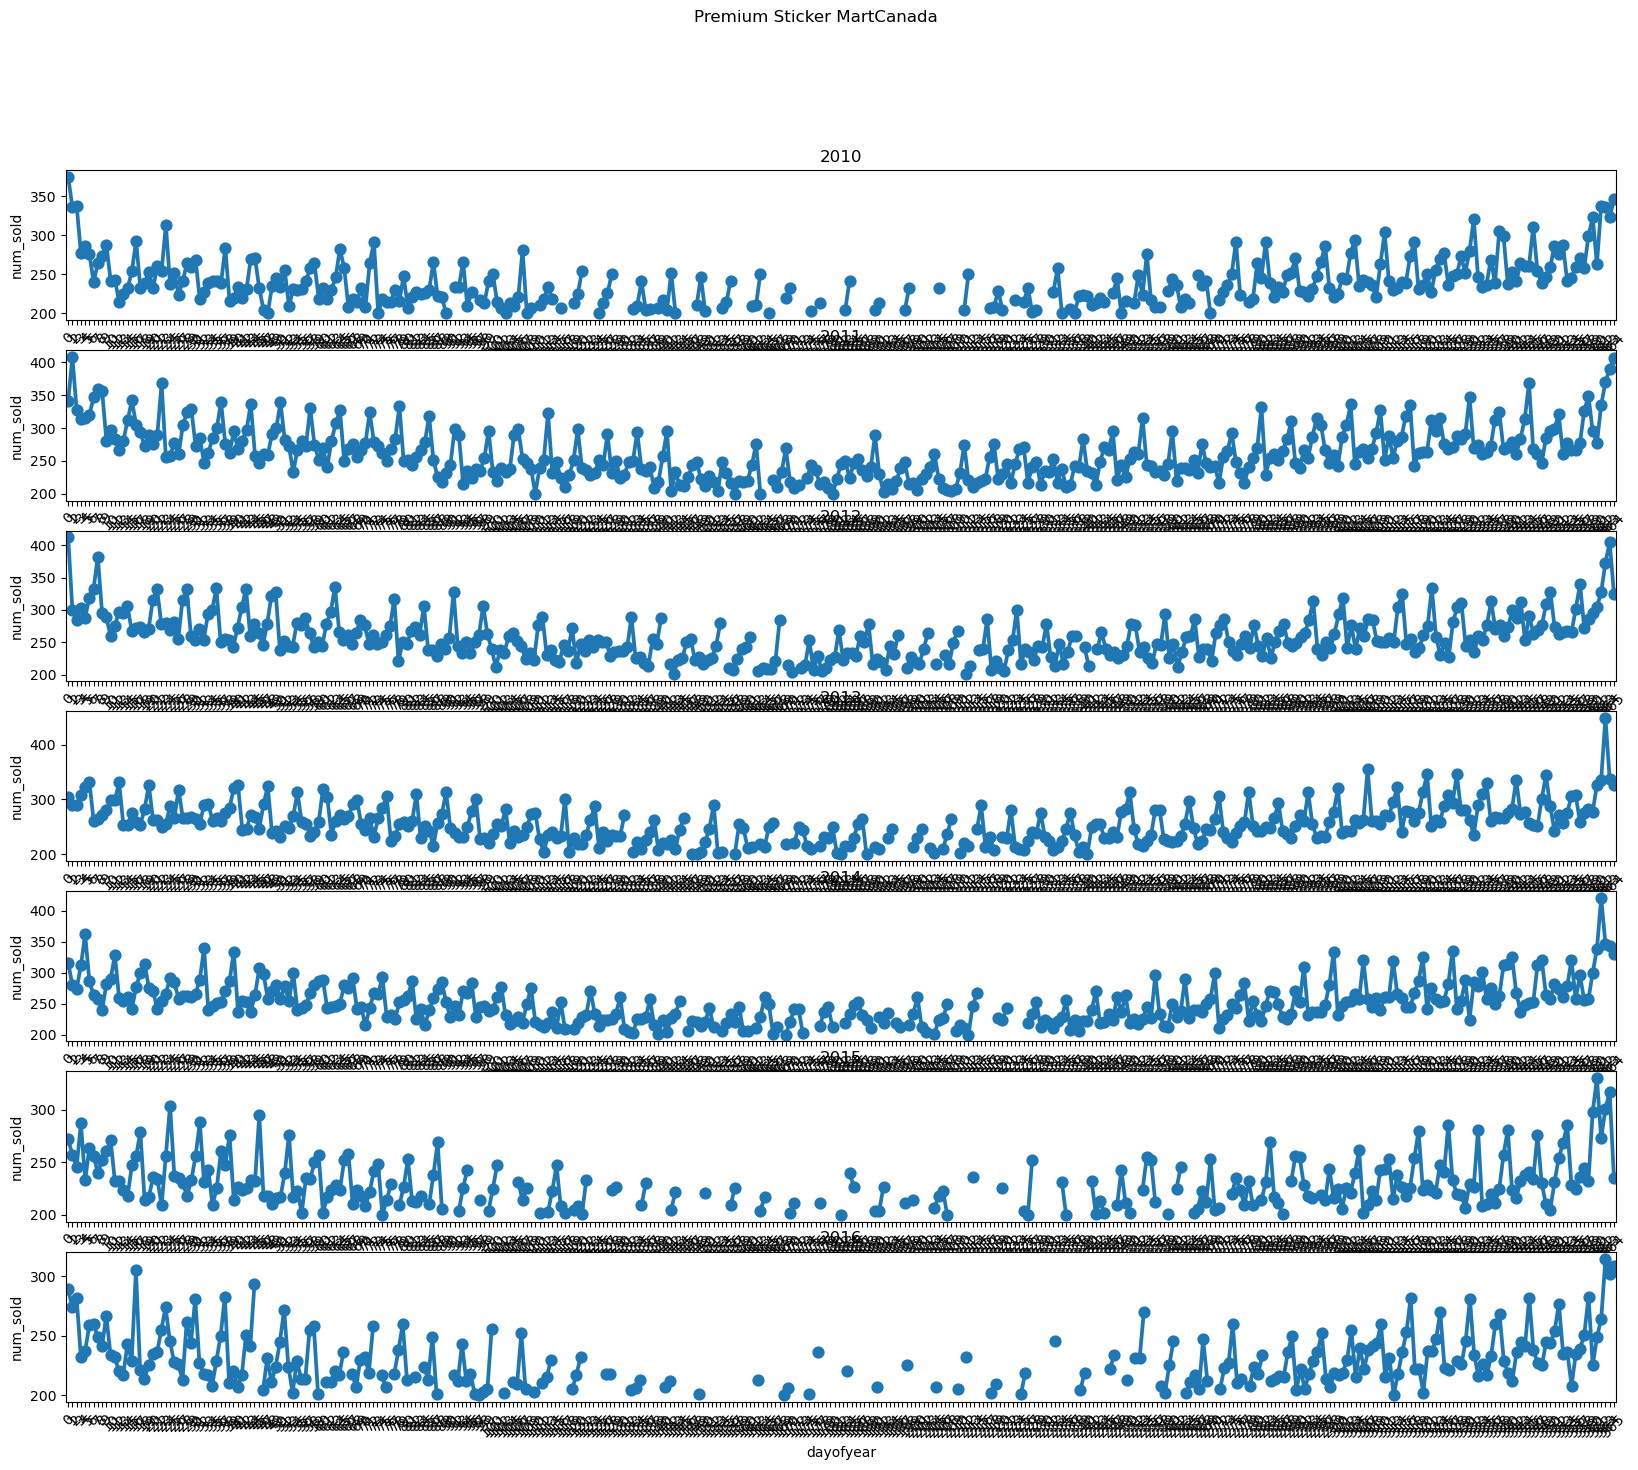

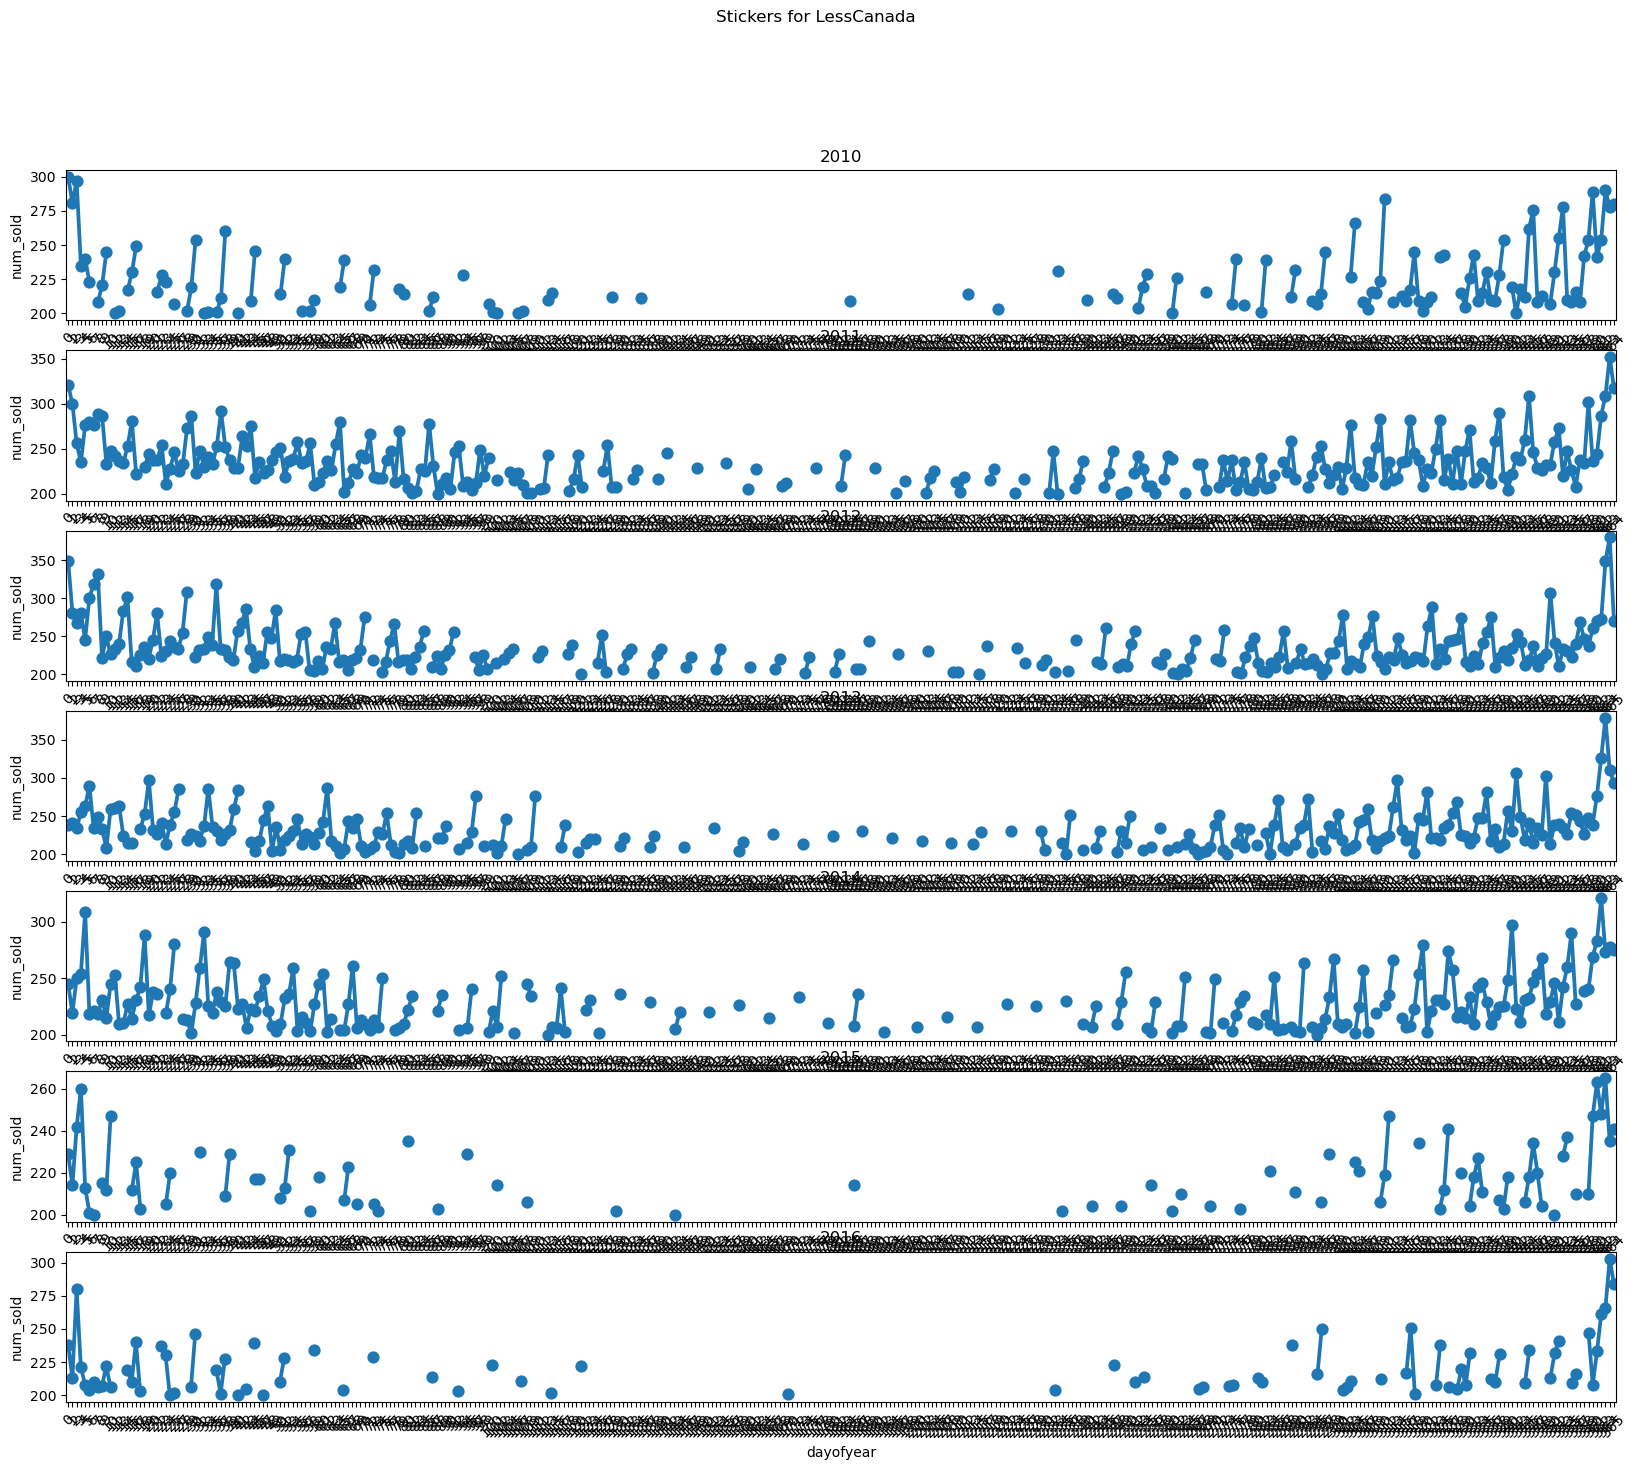

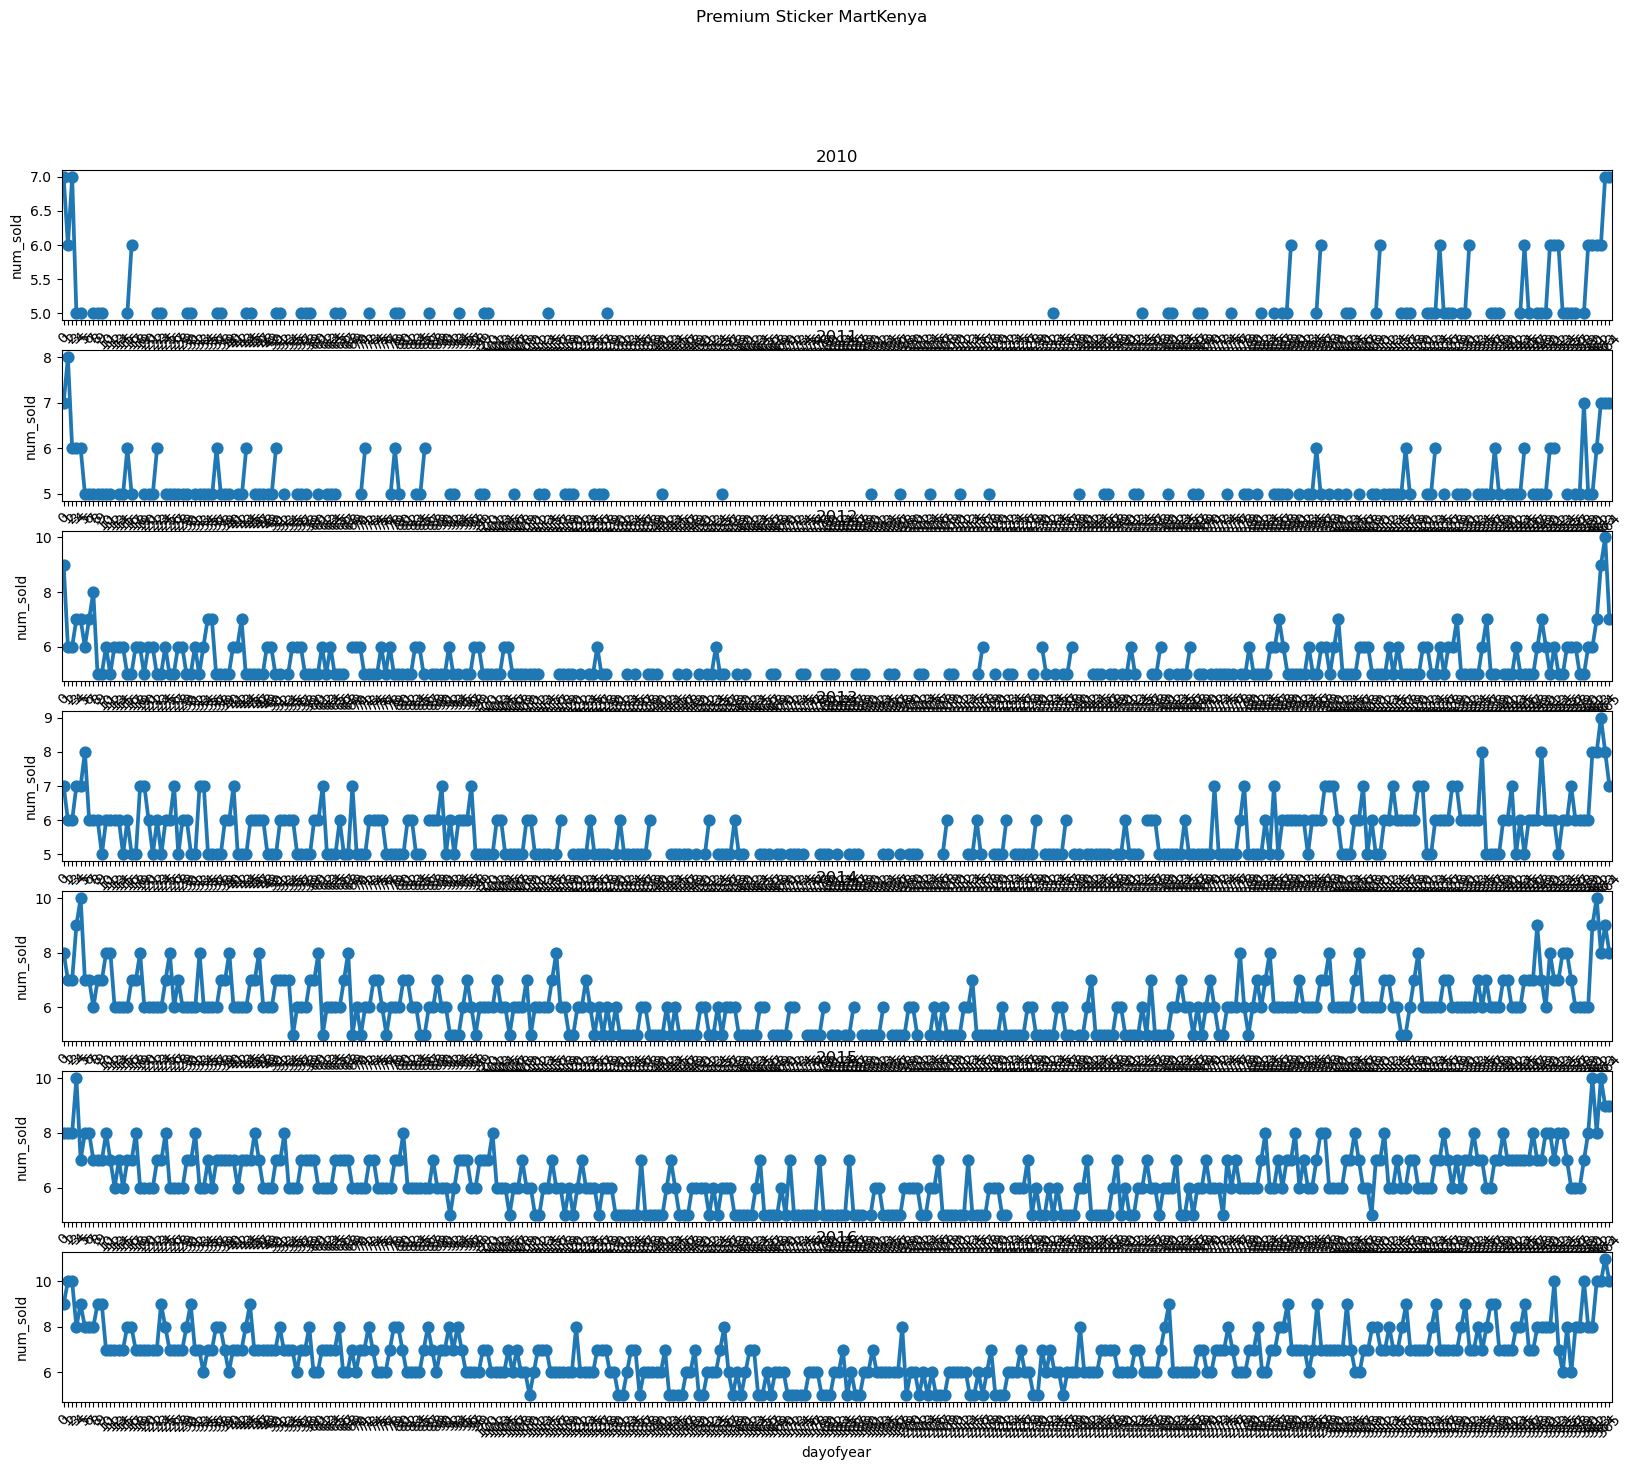

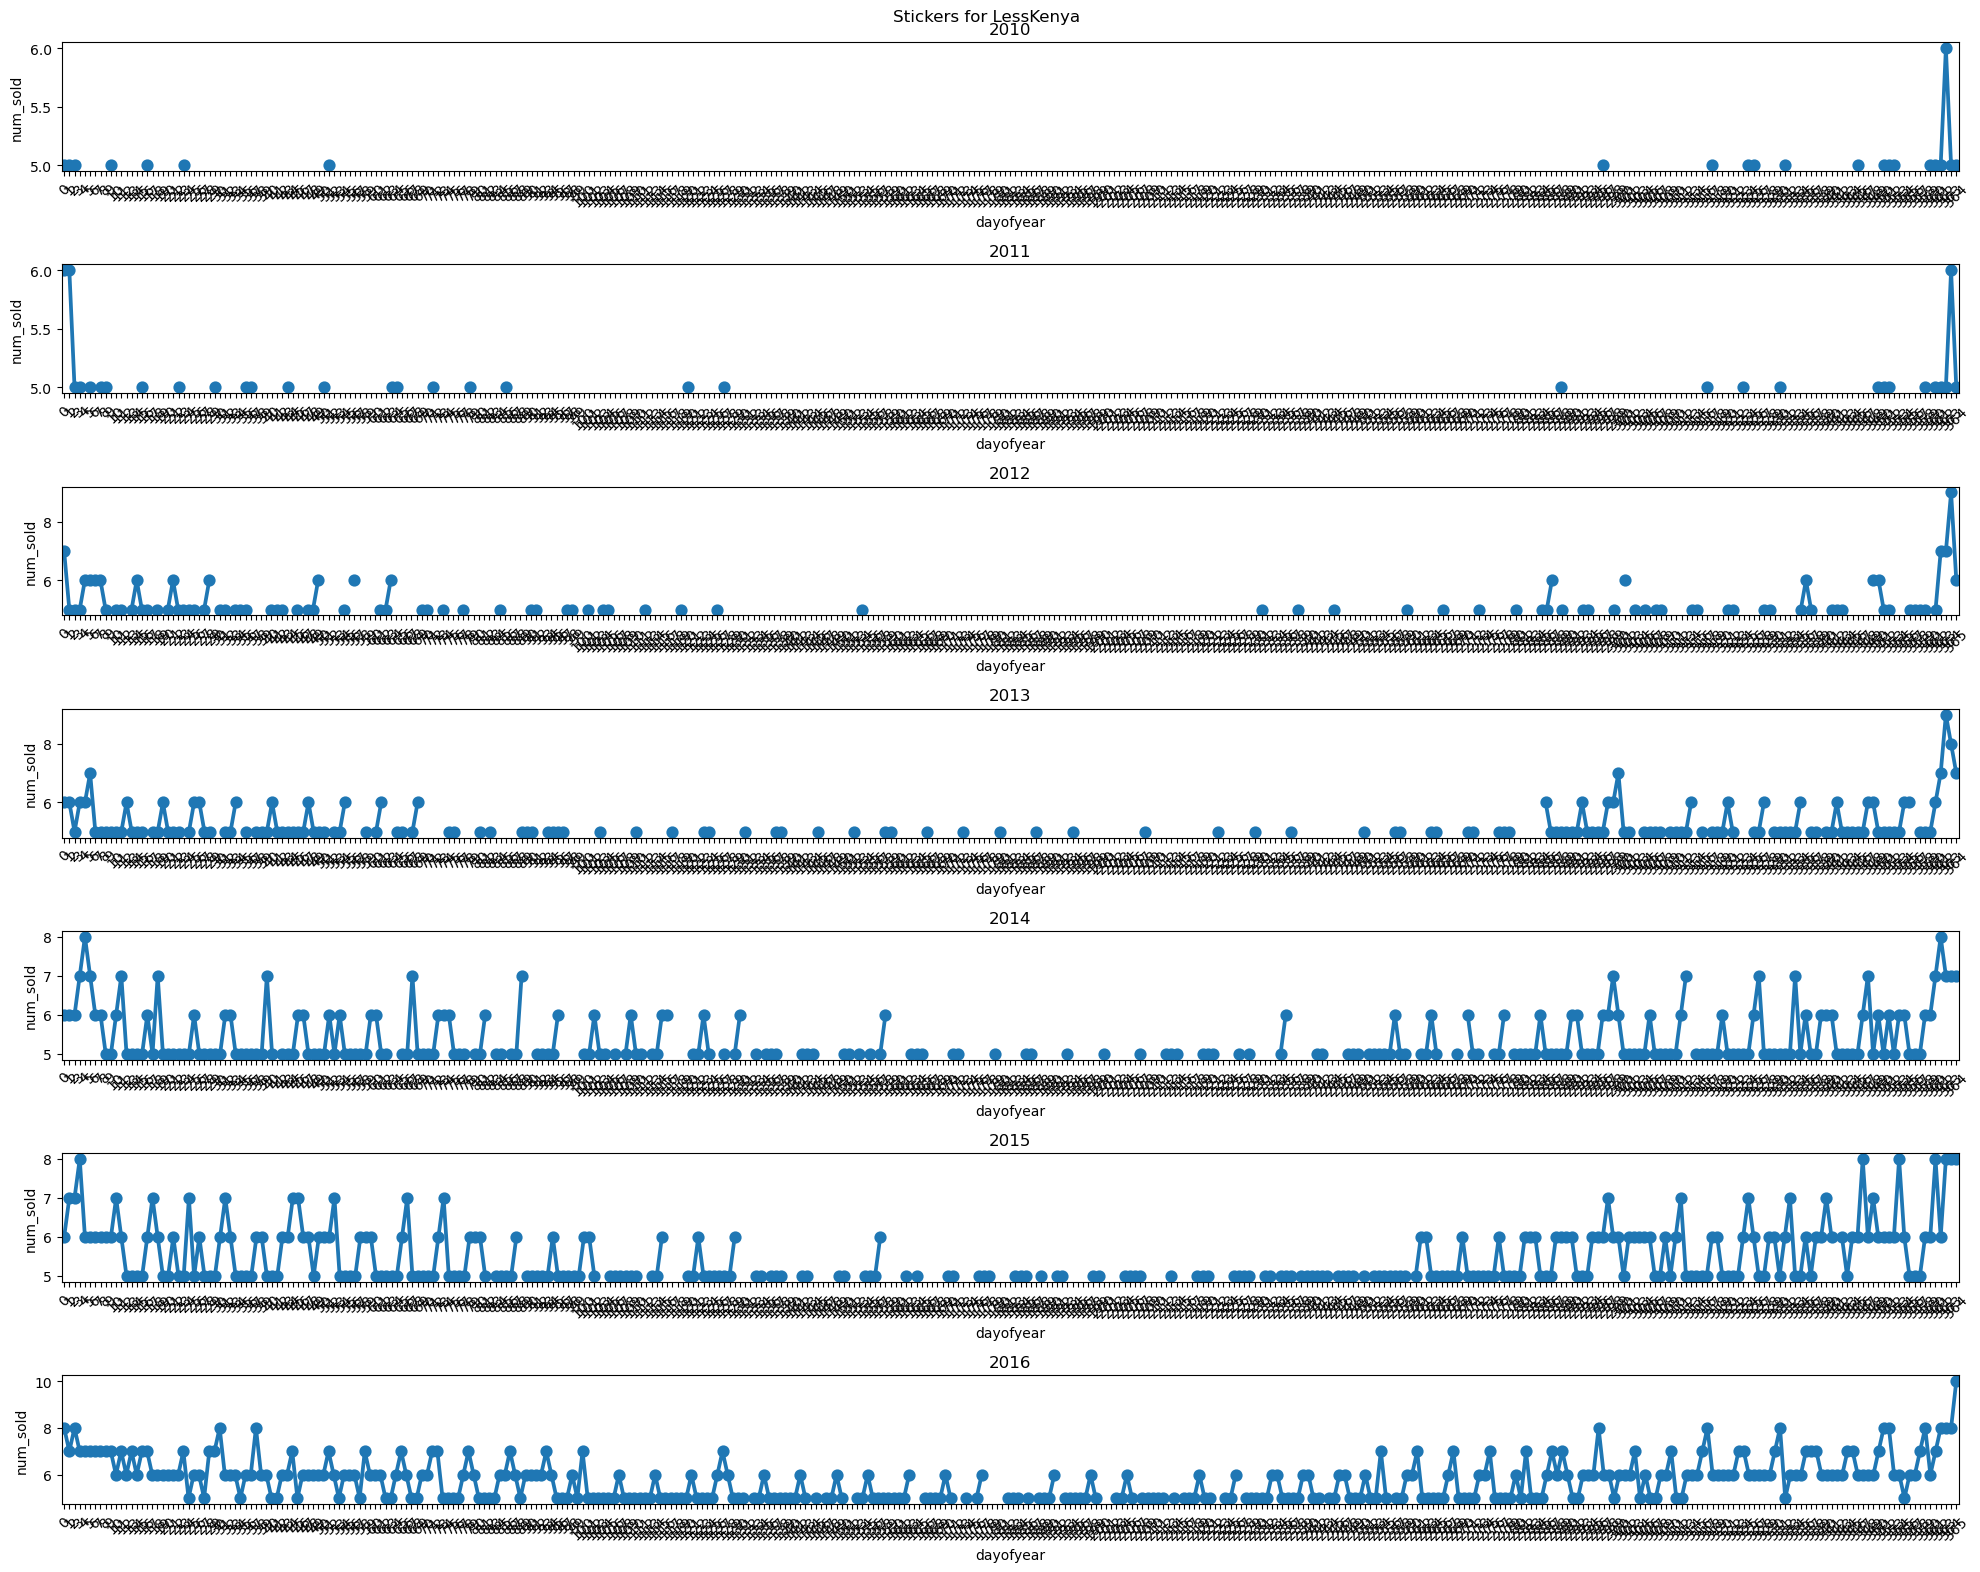

In [30]:
countries = ['Canada', 'Kenya']
stores = ['Premium Sticker Mart', 'Stickers for Less']
figures = []

for country in countries:
    for store in stores:
        fig, axs = plt.subplots(7,1, figsize=(20,16))
        for n, year in enumerate(train['year'].unique()):
            country_data = train[(train['country'] == country) & (train['store'] == store) & (train['product'] == "Holographic Goose") & (train['year'] == year)]
            sns.pointplot(x='dayofyear', y='num_sold',data=country_data, ax=axs[n],)
            axs[n].set_xticklabels(axs[n].get_xticks(), rotation=45)
            axs[n].set_title(year) 
            plt.suptitle(store+country)
            figures.append(fig)
    # plt.suptitle(country)  
plt.tight_layout()

In [30]:
train['product'].unique()

array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
       'Kerneler Dark Mode'], dtype=object)

<Axes: xlabel='country', ylabel='sales_na'>

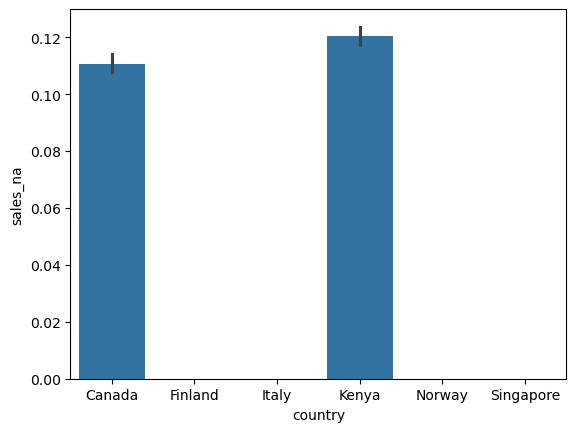

In [ ]:
sns.barplot(pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 ) , x= 'country', y = 'sales_na' )